##### import thư viện

In [1]:
import numpy as np 
import pandas as pd

ĐỌC DỮ LIỆU

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape # lấy số hàng số cột dữ liệu

(768, 9)

In [4]:
data.describe() ##mô tả dữ liệu

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### ĐẾM NULL TRONG CÁC CỘT

In [5]:
data.isna().sum()
print("Number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] ==0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Isulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))

Number of rows with glucose value 0 is: 5
number of rows with missing BloodPressure 0 is: 35
number of rows with missing skin thikness 0 is: 227
number of rows with Isulin 0 is: 374
number of rows with BMI 0 is: 11
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


XỬ LÝ NULL BẰNG THAY THẾ MEAN

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]) # thay thế dữ liệu thiếu bằng dữ liệu đã huấn luyện


GHI DỮ LIỆU RA FILE

In [7]:
data.to_csv("outputads.csv", index = False)

CHECK LẠI CÁC CỘT ĐÃ HẾT NULL CHƯA

In [8]:
data.isna().sum()
print("Number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] ==0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Isulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))

Number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Isulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


ĐẾM SỐ DỮ LIỆU DATA BỊ BỆNH VÀ KHÔNG BỊ BỆNH

In [9]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## VẼ BIỂU ĐỒ TRỰC QUAN OUTPUT

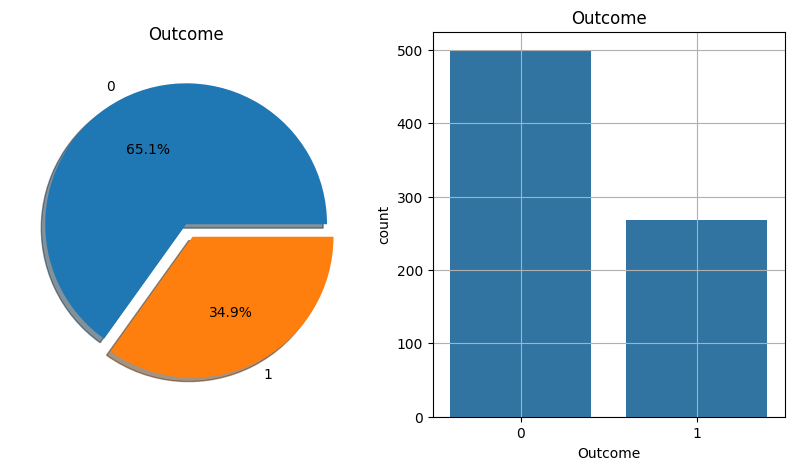

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10,5))
data['Outcome'].value_counts().plot.pie(
    explode = [0, 0.1],
    autopct = '%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=data, ax=ax[1])
ax[1].set_title('Outcome')
N, P = data['Outcome'].value_counts()

plt.grid()
plt.show()

    CHIA TẬP DỮ LIỆU: 80% TRAIN, 20% TEST

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']
x_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [12]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

ĐÁNH GIÁ MỨC ĐỘ TƯƠNG QUAN CỦA TỪNG CỘT

In [13]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train, random_state=0)
mutual_info

array([0.01555395, 0.11796705, 0.01509219, 0.01035643, 0.02548305,
       0.07923143, 0.        , 0.04601336])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.117967
BMI                         0.079231
Age                         0.046013
Insulin                     0.025483
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010356
DiabetesPedigreeFunction    0.000000
dtype: float64

<Axes: >

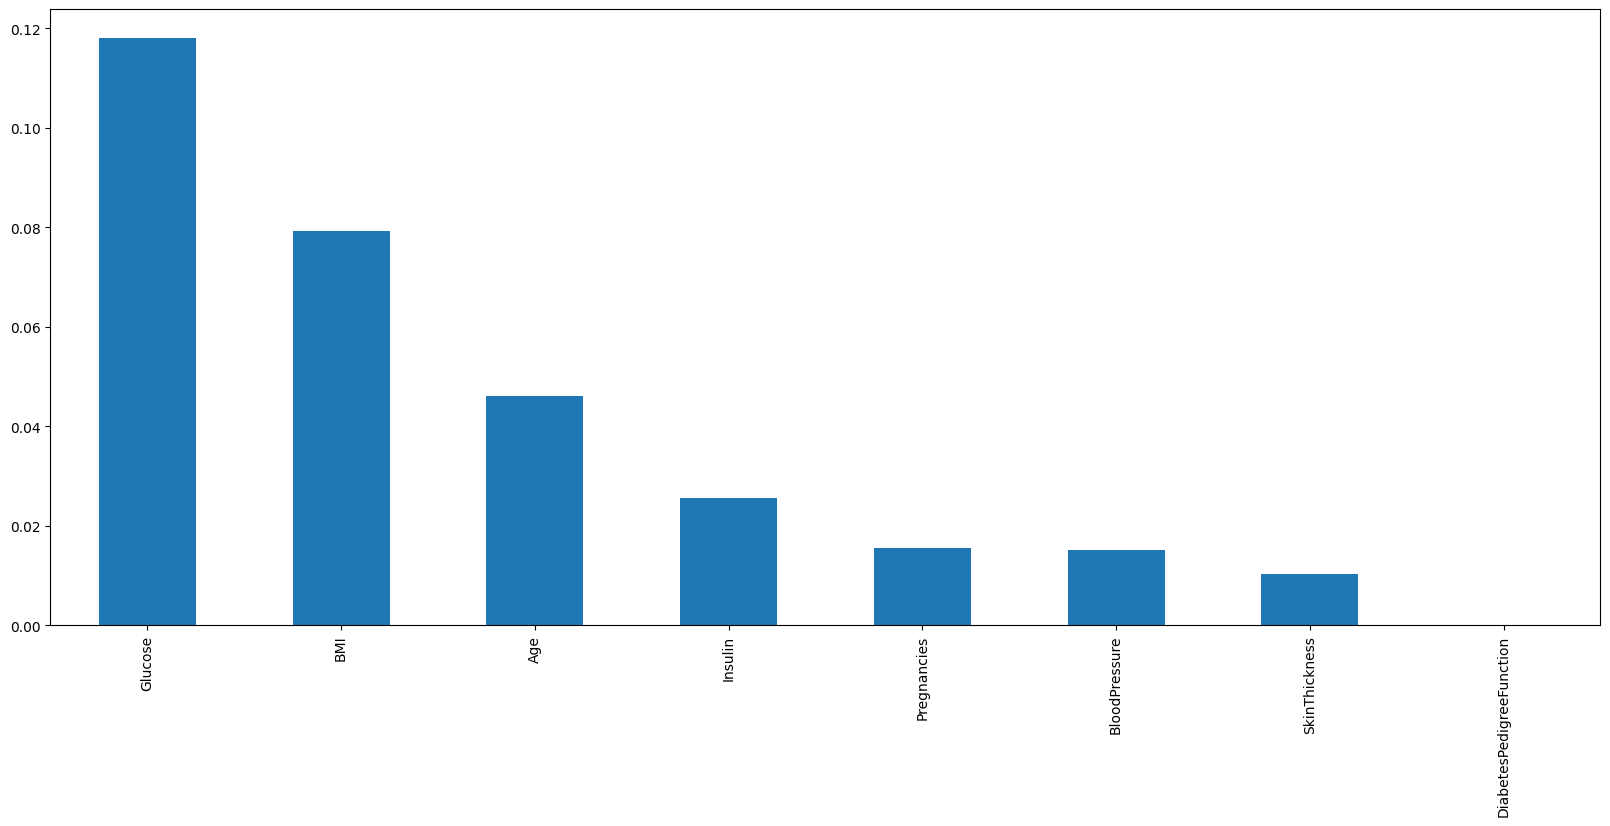

In [15]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar()

Vì yếu tố ảnh hưởng của lịch sử gia đình ít ảnh hưởng tới kết quá => loại bỏ để tối ưu thuật toán

In [16]:
data.drop(columns='DiabetesPedigreeFunction', axis=1, inplace=True)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,33,1


Z-core

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca

đếm 0,1 của tập train

In [17]:
y_train.value_counts()

Outcome
0    393
1    221
Name: count, dtype: int64

#### CÂN BẰNG DỮ LIỆU VỚI SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=0)
X_smote, y_smote = sm.fit_resample(x_train, y_train)
y_smote.value_counts()



Outcome
1    393
0    393
Name: count, dtype: int64

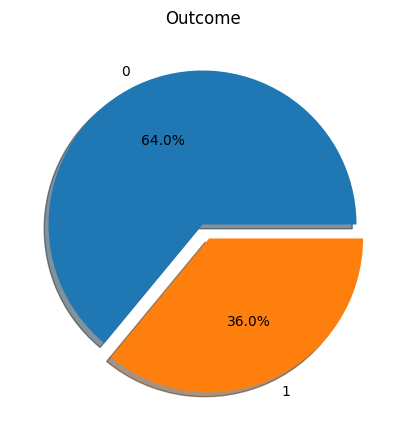

In [22]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))  # Chỉ một biểu đồ
y_train.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()

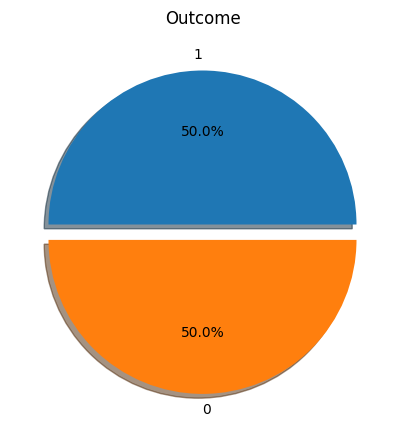

In [23]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
y_smote.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()

STACKING

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
]

# Define the meta-models
meta_model = LogisticRegression(max_iter=500, random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_smote, y_smote)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Accuracy: {accuracy:.2f}")

Stacking Accuracy: 0.80


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
]

# Define the meta-models
meta_model = LogisticRegression(max_iter=500, random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_smote, y_smote)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Accuracy: {accuracy:.2f}")

Stacking Accuracy: 0.80
